In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = 'drive/My Drive/BalanceDS/data'

In [3]:
import cv2,os

categories = os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

In [4]:
print(label_dict)

{'3': 0, '2': 1, '4': 2, '1': 3, '0': 4}


In [5]:
print(labels)

[0, 1, 2, 3, 4]


In [ ]:
img_size= 256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(  data)/255.0

data=np.reshape(data,(data.shape[0],img_size,img_size,1))

label=np.array(label)

from keras.utils import np_utils

new_label=np_utils.to_categorical(label)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The third convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(16,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The fourth CNN layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.2, random_state=42, stratify = label)

In [ ]:
print(len(data))

6870


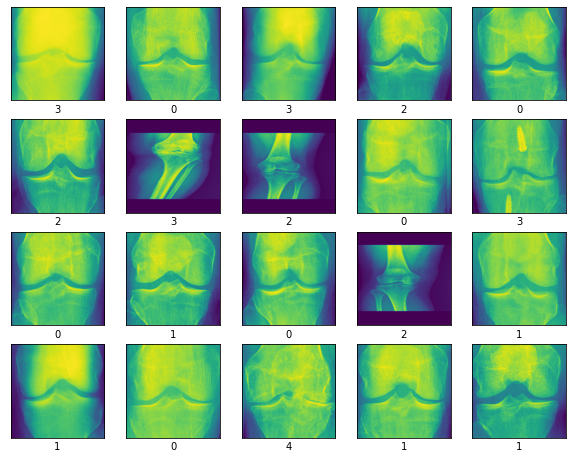

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('final_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

In [ ]:
history = model.fit(x_train,y_train,epochs=500,validation_split=0.2,callbacks=callbacks)

Epoch 1/500
138/138 [==============================] - ETA: 0s - loss: 1.6075 - accuracy: 0.2013
Epoch 1: val_accuracy improved from -inf to 0.23545, saving model to final_model.h5
138/138 [==============================] - 32s 159ms/step - loss: 1.6075 - accuracy: 0.2013 - val_loss: 1.5779 - val_accuracy: 0.2355
Epoch 2/500
138/138 [==============================] - ETA: 0s - loss: 1.5809 - accuracy: 0.2345
Epoch 2: val_accuracy improved from 0.23545 to 0.23727, saving model to final_model.h5
138/138 [==============================] - 21s 150ms/step - loss: 1.5809 - accuracy: 0.2345 - val_loss: 1.5813 - val_accuracy: 0.2373
Epoch 3/500
138/138 [==============================] - ETA: 0s - loss: 1.5053 - accuracy: 0.2998
Epoch 3: val_accuracy improved from 0.23727 to 0.34909, saving model to final_model.h5
138/138 [==============================] - 21s 151ms/step - loss: 1.5053 - accuracy: 0.2998 - val_loss: 1.4221 - val_accuracy: 0.3491
Epoch 4/500
138/138 [============================

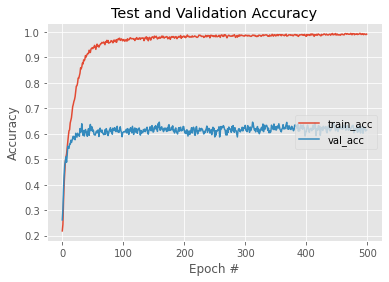

In [ ]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 500 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Test and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
vaL_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 2.988647937774658 %
test accuracy: 0.5938864350318909 %


1/1 [==============================] - 0s 87ms/step
Prediction: 3
Actual Label:  0


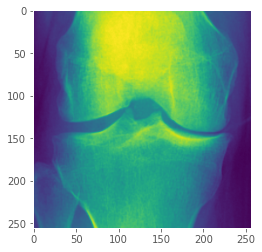

In [ ]:
X = 60
img_size = 256
img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],img_size,img_size,1)

predictions_single = model.predict(img_single)
print('Prediction:', categories[np.argmax(predictions_single)])
print("Actual Label: ", np.argmax(y_test[X]))
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

43/43 [==============================] - 1s 12ms/step


<Figure size 432x288 with 0 Axes>

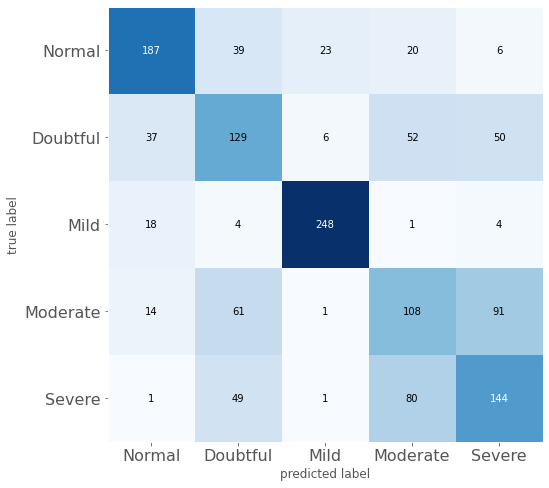

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mild','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mild','Moderate','Severe'], fontsize=16)
plt.show()

